In [32]:
#导入依赖库
import pandas as pnd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn import model_selection
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator
from sklearn.model_selection import KFold
 
import itertools
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
 
from sklearn import tree
import seaborn as sns
 
from IPython.display import Image
 
%matplotlib inline

In [14]:
# 添加列名
header_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']
 
# 载入数据
heart = pnd.read_csv('processed.cleveland.data.csv', names=header_row)
heart[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
#查看数据维度
heart.shape

(303, 14)

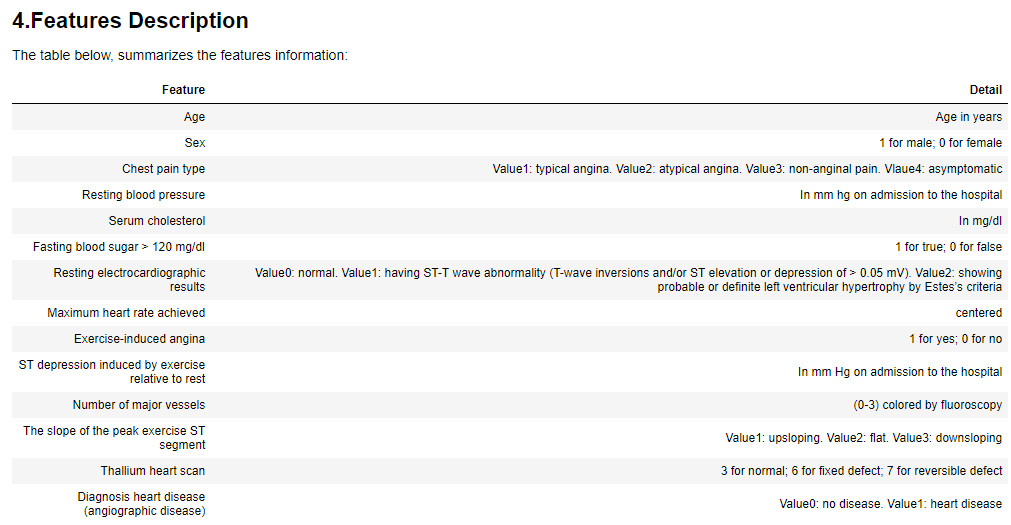

In [16]:
# 计算统计值
heart.describe()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [17]:
names_descr = dict()
categorical_columns = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiographic", "induced_angina", "slope", "vessels", \
                       "thal", "diagnosis"]
for c in categorical_columns:
    print  (heart.groupby([c])["age"].count())

sex
0.0     97
1.0    206
Name: age, dtype: int64
chest_pain
1.0     23
2.0     50
3.0     86
4.0    144
Name: age, dtype: int64
fasting_blood_sugar
0.0    258
1.0     45
Name: age, dtype: int64
electrocardiographic
0.0    151
1.0      4
2.0    148
Name: age, dtype: int64
induced_angina
0.0    204
1.0     99
Name: age, dtype: int64
slope
1.0    142
2.0    140
3.0     21
Name: age, dtype: int64
vessels
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: age, dtype: int64
thal
3.0    166
6.0     18
7.0    117
?        2
Name: age, dtype: int64
diagnosis
0    164
1     55
2     36
3     35
4     13
Name: age, dtype: int64


In [18]:
for c in heart.columns[:-1]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)   

In [19]:
set(heart.loc[:, "diagnosis"].values)

{0, 1, 2, 3, 4}

In [20]:
#计算1,2,3,4 levels 之间的相似性
vecs_1 = heart[heart["diagnosis"] == 1 ].median().values[:-2]
vecs_2 = heart[heart["diagnosis"] == 2 ].median().values[:-2]
vecs_3 = heart[heart["diagnosis"] == 3 ].median().values[:-2]
vecs_4 = heart[heart["diagnosis"] == 4 ].median().values[:-2]

In [21]:
print ("Similarity between type 1 and type 2 is ", np.linalg.norm(vecs_1-vecs_2))
print ("Similarity between type 1 and type 3 is ", np.linalg.norm(vecs_1-vecs_3))
print ("Similarity between type 1 and type 4 is ", np.linalg.norm(vecs_1-vecs_4))
print ("Similarity between type 2 and type 3 is ", np.linalg.norm(vecs_2-vecs_3))
print ("Similarity between type 2 and type 4 is ", np.linalg.norm(vecs_2-vecs_4))
print ("Similarity between type 3 and type 4 is ", np.linalg.norm(vecs_3-vecs_4))

Similarity between type 1 and type 2 is  10.383159442096611
Similarity between type 1 and type 3 is  21.283796653792763
Similarity between type 1 and type 4 is  29.76390431378249
Similarity between type 2 and type 3 is  13.077079184588582
Similarity between type 2 and type 4 is  27.939935576160515
Similarity between type 3 and type 4 is  29.521009467834936


In [22]:
sim = {"(1,2)": np.linalg.norm(vecs_1-vecs_2), \
       "(1,3)": np.linalg.norm(vecs_1-vecs_3),\
       "(1,4)": np.linalg.norm(vecs_1-vecs_4),\
       "(2,3)": np.linalg.norm(vecs_2-vecs_3),\
       "(2,4)": np.linalg.norm(vecs_2-vecs_4),\
       "(3,4)": np.linalg.norm(vecs_3-vecs_4)    
      }

In [23]:
#可以分别使用每个特征的值来比较心脏病的类型
heart_d = heart[heart["diagnosis"] >= 1 ]
heart_d[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [24]:
#数据预处理
# if "diagnosis" == 0, 没有疾病
# if "diagnosis" >= 1, 有疾病
heart.loc[:, "diag_int"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

In [25]:
#数据标准化
preprocessing.Normalizer().fit_transform(heart)

array([[0.19741527, 0.00313358, 0.00313358, ..., 0.01880145, 0.        ,
        0.        ],
       [0.19057465, 0.0028444 , 0.01137759, ..., 0.00853319, 0.0056888 ,
        0.0028444 ],
       [0.22578159, 0.00336987, 0.0134795 , ..., 0.02358912, 0.00336987,
        0.00336987],
       ...,
       [0.25334975, 0.00444473, 0.01777893, ..., 0.03111313, 0.0133342 ,
        0.00444473],
       [0.17495449, 0.        , 0.00613875, ..., 0.00920813, 0.00306938,
        0.00306938],
       [0.13346695, 0.00351229, 0.01053686, ..., 0.01053686, 0.        ,
        0.        ]])

In [27]:
#划分数据集
heart_train, heart_test, goal_train, goal_test = model_selection.train_test_split(heart.loc[:,'age':'thal'], \
                                                 heart.loc[:,'diag_int'], test_size=0.33, random_state=0)  

In [28]:
#计算相关系数
corr = heart.corr()
heart.corr()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,diag_int
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469,0.276816
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075,0.414446
blood pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754,0.150825
serum_cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909,0.085164
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186,0.025264
electrocardiographic,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696,0.169202
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040,-0.417167
induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057,0.431894
ST_depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092,0.424510
